# Overview

This notebook demonstrates using an LLM to generate marketing copy for a new product.

It consists of the following steps, each of which is expanded upon in the respective sections below:

1. Prompt Template

2. Copy Generation

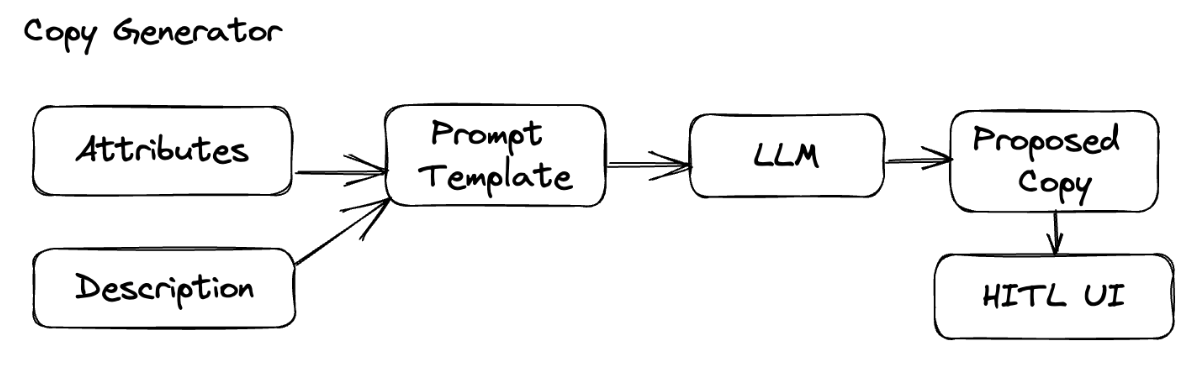

# Motivation

When a new product is added to inventory we know basic details about it such as attributes and a sparse description. However we need a compelling marketing description
that will entice users to buy the product. An LLM is a great tool for generating this.

# Setup

### Install Dependencies (If Needed)

The list `packages` contains tuples of package import names and install names. If the import name is not found then the install name is used to install quitely for the current user.

In [1]:
# tuples of (import name, install name)
packages = [
    ('google.cloud.aiplatform', 'google-cloud-aiplatform'),
]

import importlib
install = False
for package in packages:
    if not importlib.util.find_spec(package[0]):
        print(f'installing package {package[1]}')
        install = True
        !pip install {package[1]} -U -q --user

### Restart Kernel (If Installs Occured)

After a kernel restart the code submission can start with the next cell after this one.

In [ ]:
if install:
    import IPython
    app = IPython.Application.instance()
    app.kernel.do_shutdown(True)

### Authenticate

If you are using Colab, you will need to authenticate yourself first. The next cell will check if you are currently using Colab, and will start the authentication process.

If you are using Vertex AI Workbench, you will not require additional authentication.

In [ ]:
import sys

if 'google.colab' in sys.modules:
    from google.colab import auth as google_auth
    google_auth.authenticate_user()

### Config

In [2]:
# GCP
PROJECT = 'solutions-2023-mar-107'
LOCATION = 'us-central1'

# 0. Input

We assume we have a sparse user submitted description and a list of attributes.

In [9]:
DESCRIPTION = "Men’s Hooded Puffer Jacket"
ATTRIBUTES = {'color':'green', 'pattern': 'striped', 'material': 'down'}

# 1. Prompt Template

In [10]:
prompt = f"""
Generate a compelling and accurate product description
for a product with the following description and attributes.

Description:
{DESCRIPTION}

Attributes:
{ATTRIBUTES}
"""

print(prompt)


Generate a compelling and accurate product description
for a product with the following description and attributes.

Description:
Men’s Hooded Puffer Jacket

Attributes:
{'color': 'green', 'pattern': 'striped', 'material': 'down'}



# 2. Generate Copy


In [20]:
import vertexai
from vertexai.language_models import TextGenerationModel

# Initialize the client
vertexai.init(project=PROJECT, location=LOCATION)

# Use the text-bison model from the Vertex Model Garden
model = TextGenerationModel.from_pretrained("text-bison@001")

# Update the default max_output_tokens
parameters = {
    "max_output_tokens": 1024,
    "temperature": 0.5}

# Query the model
response = model.predict(prompt, **parameters)

# Print the result
response.text

'Our men’s hooded puffer jacket is the perfect way to stay warm and stylish this winter. Made from 100% down, this jacket is lightweight and insulating, while the water-repellent finish will keep you dry in the rain. The striped design and green color are sure to turn heads, and the adjustable hood and drawstring waist ensure a comfortable fit.'